## Imports

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score

# Linear Regression

🎯 In this exercise, you will model the performance of an NBA player's win rating (`win_rating`) according to their game statistics (like minutes played, `mp`). 

❓ Load the `NBA.csv` dataset into this notebook as a pandas dataframe, and display its first 5 rows.

In [39]:
df=pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/NBA.csv")
df.head(5)

,season,poss,mp,do_ratio,pacing,win_rating
0,1987,4847,2409,-1.546275,-0.599918,1.643091
1,2017,5582,2708,0.996587,0.531888,10.808427
2,2016,4976,2407,0.242598,0.127976,3.054773
3,2021,1178,585,-1.343806,-1.201034,0.230004
4,1988,4534,2056,-1.813990,-0.128997,0.905614


ℹ️ You can read a detailed description of the dataset in the challenge README. Make sure to refer to it throughout the challenge.

## 1. Define Feature Set and Target

🎯 The first objective is to model the players' overall performance rating compared to peers, called *Wins Above Replacement*, (`win_rating`) against the minutes that they've played (`mp`)

❓ Assign those two variables to `X` and `y`. Remember that `X` is the feature(s), and `y` is the target.

In [40]:
X = df[["mp"]]

y = df["win_rating"]


👇 In a [scatter plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html), visualize the relationship between the rating and the minutes played.

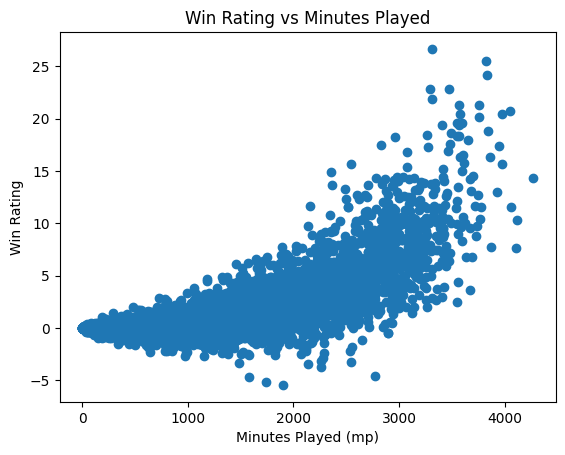

In [41]:
plt.figure()
plt.scatter(X, y)
plt.xlabel('Minutes Played (mp)')
plt.ylabel('Win Rating')
plt.title('Win Rating vs Minutes Played')
plt.show()


ℹ️ The scatter plot should hint that there is a relationship. But is it a perfectly linear relationship? 🤔 We'll see!

## 2. Cross-Validation

👇 Using Sklearn's [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html), run a 5-fold cross-validation on a [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model predicting the player performance rating from minutes played. Save the raw output of the cross-validation under a new variable called `cv_results`.

In [42]:
model = LinearRegression()
cv_results = cross_validate(model, X, y, cv=5)
# Scores
print(cv_results['test_score'])

# Mean of scores
cv_results['test_score'].mean()

[0.5555057  0.53447908 0.53790391 0.57658459 0.57917762]


0.5567301800068911

❓ What is the lowest score of the cross-validation? Compute your answer and save the value under a new variable called `min_score`.

In [43]:
min_score=cv_results['test_score'].min()

❓ What is the highest score of the cross-validation?  Compute your answer and save the value under a new variable called `max_score`.

In [44]:
max_score=cv_results['test_score'].max()
max_score

0.5791776193355005

❓ What is the mean score of the cross-validation? Compute your answer and save the value under a new variable called `mean_score`.

In [45]:
mean_score=cv_results['test_score'].mean()

ℹ️ When running a cross-validation, we always look at the mean score as the most robust and representative evaluation of the model's performance.

### ☑️ Test your code

In [46]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'cv_results',
    cv_result = cv_results,
    mean_score = mean_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/simonhingant/.pyenv/versions/3.12.9/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/simonhingant/code/simsam56/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 2 items

test_cv_results.py::TestCvResults::test_cv_mean PASSED                   [ 50%]
test_cv_results.py::TestCvResults::test_cv_results PASSED                [100%]

============================== 2 passed in 0.10s ===============================


💯 You can commit your code:

git add tests/cv_results.pickle

git commit -m 'Completed cv_results step'

git push origin master



❓ Plot the evolution of **<u>total</u> computational time (fitting and scoring)** and **<u>mean</u> score** as `K` increases from 2 to 20.

In [36]:
K_values = range(2,21)
mean_scores = []
total_times = []
for K in K_values :
    cv = KFold(n_splits=K, shuffle=True, random_state=42)
    cv_results = cross_validate(LinearRegression(), X, y, cv=cv, scoring='r2')
    mean_scores.append(np.mean(cv_results['test_score'])) #moyenne de R2
    total_time = cv_results['fit_time'].sum() + cv_results['score_time'].sum()
    total_times.append(total_time)


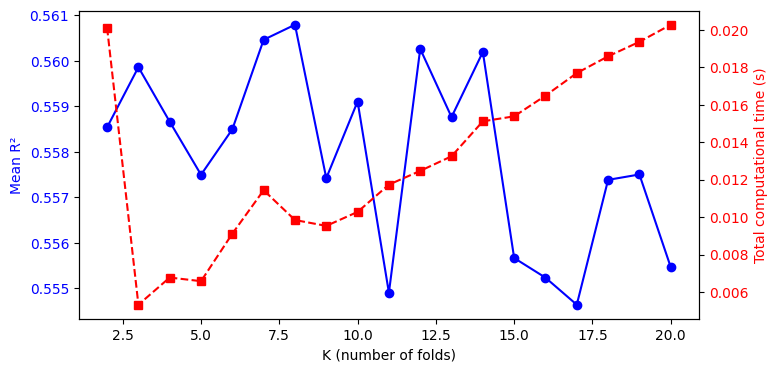

In [37]:
# --- Tracé ---
fig, ax1 = plt.subplots(figsize=(8, 4))

# Axe gauche : R² moyen
ax1.plot(K_values, mean_scores, color='b', marker='o', label='Mean R² score')
ax1.set_xlabel('K (number of folds)')
ax1.set_ylabel('Mean R²', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Axe droit : temps total
ax2 = ax1.twinx()
ax2.plot(K_values, total_times, color='r', linestyle='--', marker='s', label='Total time (s)')
ax2.set_ylabel('Total computational time (s)', color='r')
ax2.tick_params(axis='y', labelcolor='r')


ℹ️ You should see that the $R^2$ score stays stable, which is a good sign that the model performs equally on smaller and larger test sizes. Meanwhile, the computational time keeps increasing. For that reason, we do not exceed K = 10 as a rule of thumb.

## 3. Train the Model

Cross-validation is used to evaluate a hypothetical model on the dataset. It trains the chosen model multiple times (the number of folds you chose), each time on another subset of the data, using the rest of the data to calculate the score. This gives us a cross-validated score, telling us how good this model can perform.

If you want to use the model to make predictions, you prefer to train the model on as much data as possible. So, without putting part of the data aside.

❓ Go ahead and train the model on the full `X` and `y` (as we've already validated the model's score, and now will use it to predict). Save the trained model under the variable `model`.

In [64]:
# Instantiate the model (💡 in Sklearn often called "estimator")
model = LinearRegression()

# Define X and y
X = df[["mp"]]
y = df["win_rating"]

# Train the model on the data
model.fit(X, y)


LinearRegression()

❓ What is the slope of your trained model? It can be accessed via the model's attributes. Save the slope under a variable named `slope`.

In [57]:
# View the model's slope (a)
slope = model.coef_[0]
slope

0.0026025799386401927

In [ ]:
# YOUR CODE HERE

❓ What is the intercept of your trained model? It can be accessed via the model's attributes. Save the intercept under a variable named `intercept`.

In [55]:
# View the model's intercept (b)
intercept = model.intercept_

🤔 Make sure you understand how to interpret these coefficients before moving on.

### ☑️ Test your code

In [58]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'trained_model',
    slope = slope,
    intercept = intercept
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/simonhingant/.pyenv/versions/3.12.9/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/simonhingant/code/simsam56/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 2 items

test_trained_model.py::TestTrainedModel::test_intercept PASSED           [ 50%]
test_trained_model.py::TestTrainedModel::test_slope PASSED               [100%]

============================== 2 passed in 0.11s ===============================


💯 You can commit your code:

git add tests/trained_model.pickle

git commit -m 'Completed trained_model step'

git push origin master



## 4. Predict

❓ Use your trained model to predict the performance rating of a player who has played 1000 minutes in total. Save the predicted value in a variable called `prediction`.

In [72]:
# YOUR CODE HERE
# Predict on new data

prediction_value = pd.DataFrame({'mp': [1000]})

prediction = model.predict(prediction_value)
prediction

array([1.056205])

### ☑️ Test your code

In [70]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'prediction',
    prediction = prediction
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/simonhingant/.pyenv/versions/3.12.9/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/simonhingant/code/simsam56/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 1 item

test_prediction.py::TestPrediction::test_prediction PASSED               [100%]

=============================== warnings summary ===============================
test_prediction.py::TestPrediction::test_prediction
  /Users/simonhingant/code/simsam56/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests/test_prediction.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
    self.asser

## 5. Improving the Model with More Features

Your friend who enjoys the NBA fantasy league comes to you with some insights 🏀

They say that when evaluating a player's Wins Above Replacement rating, they would typically also look at the number of ball possessions (`poss`), their defense/offense ratio, and their pacing.

❓ Visualize the correlation between these new features and the `win_rating`. You can use `matplotlib` or `seaborn`. Which **one** of the above features would you consider adding to your model?

In [78]:
df.corr(numeric_only=True)['win_rating']

season       -0.042861
poss          0.742017
mp            0.748268
do_ratio      0.666120
pacing       -0.202611
win_rating    1.000000
Name: win_rating, dtype: float64

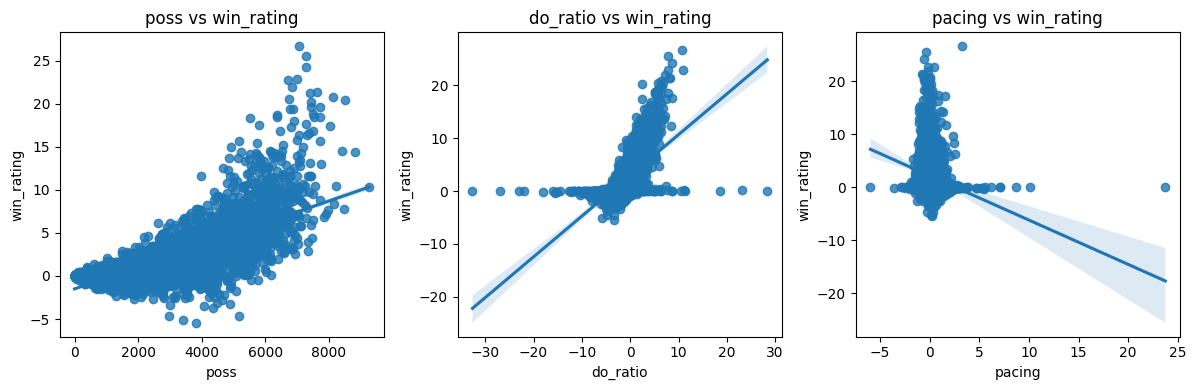

In [79]:

# Liste des features à tester
features = ["poss", "do_ratio", "pacing"]

plt.figure(figsize=(12, 4))

# On boucle avec enumerate pour obtenir l'indice (i) et le nom (feature)
for i, feature in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.regplot(x=df[feature], y=df["win_rating"])
    plt.title(f"{feature} vs win_rating")

plt.tight_layout()
plt.show()


<details>
    <summary>💡 Click here for a hint</summary>
    A seaborn <code>regplot</code> might be very handy here.
</details>

Now let's see if the model with two features (the new one you picked and `mp`) is better at predicting a player's rating than our first model.

❓ Create a new set of features - it should be a DataFrame with two columns.

In [87]:
# Instantiate the model (💡 in Sklearn often called "estimator")
model = LinearRegression()

# Define X and y
X = df[['mp',"do_ratio"]]
y=df["win_rating"]

# Train the model on the data
model.fit(X, y)

LinearRegression()

❓ Now cross-validate a new linear regression model and save the **mean** score to `mean_2_feat_score`.

> Note: if you only care about the cross-validation score, you can use sklearn's [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [88]:
# 5-Fold Cross validate model
cv_results = cross_validate(model, X, y, cv=5)

# Scores
print(cv_results['test_score'])

# Mean of scores
mean_2_feat_score = cv_results['test_score'].mean()
mean_2_feat_score

[0.64623763 0.62713011 0.57717502 0.65851969 0.6498017 ]


0.6317728310765245

### ☑️ Test your code

In [89]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'improved_score',
    improved_score = mean_2_feat_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/simonhingant/.pyenv/versions/3.12.9/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/simonhingant/code/simsam56/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 1 item

test_improved_score.py::TestImprovedScore::test_improved_score PASSED    [100%]

============================== 1 passed in 0.10s ===============================


💯 You can commit your code:

git add tests/improved_score.pickle

git commit -m 'Completed improved_score step'

git push origin master



You should see an **increase of around 8%** in your $R^2$ 👏

Congrats, you just performed your first manual *feature selection* - we'll see more ways to do that this week!

🤔 But is this the best we can do with Linear Regression? Let's explore more in the next challenge!

# 🏁